In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

N = 52
K = 12

def p(k, n=12):
    return (comb(K,k) * comb(N-K,n-k)) / comb(N,n)

Text(0, 0.5, 'Probability')

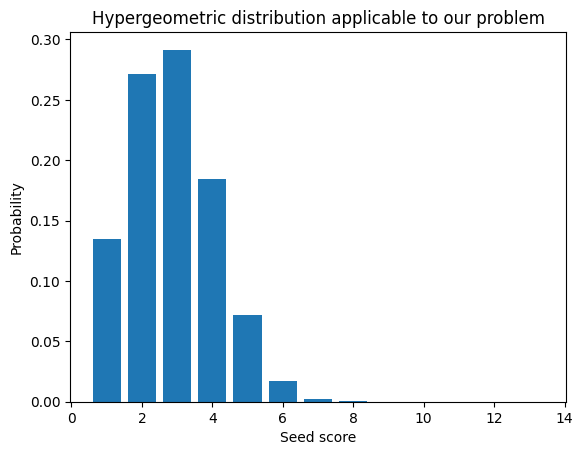

In [2]:
k = np.arange(1, 14)

p_values = np.zeros(len(k))
for i in range(len(k)):
    p_values[i] = p(k[i])
    # if i>0:
    #     p_values[i] += p_values[i-1]

plt.bar(k, p_values)
plt.title("Hypergeometric distribution applicable to our problem")
plt.xlabel("Seed score")
plt.ylabel("Probability")

In [3]:
import random


def sample_hypergeometric(num_samples=1, n=13):
    probabilities = [p(k) for k in range(max(0, n - (N - K)), min(K, n) + 1)]
    cumulative_probabilities = np.cumsum(probabilities)
    cumulative_probabilities /= cumulative_probabilities[-1]

    samples = []
    for _ in range(num_samples):
        rand = random.random()
        for k, cum_prob in enumerate(cumulative_probabilities):
            if rand <= cum_prob:
                samples.append(k)
                break

    return samples



In [4]:
samples = sample_hypergeometric(13)
print("Mean:", np.mean(samples))
print("Variance:", np.var(samples))
print('Max:', max(samples))

n_sim = 10000
samples_sim = np.zeros(n_sim)
for i in range(n_sim):
    samples_sim[i] = max(sample_hypergeometric(13))

Mean: 2.230769230769231
Variance: 1.8698224852071006
Max: 5


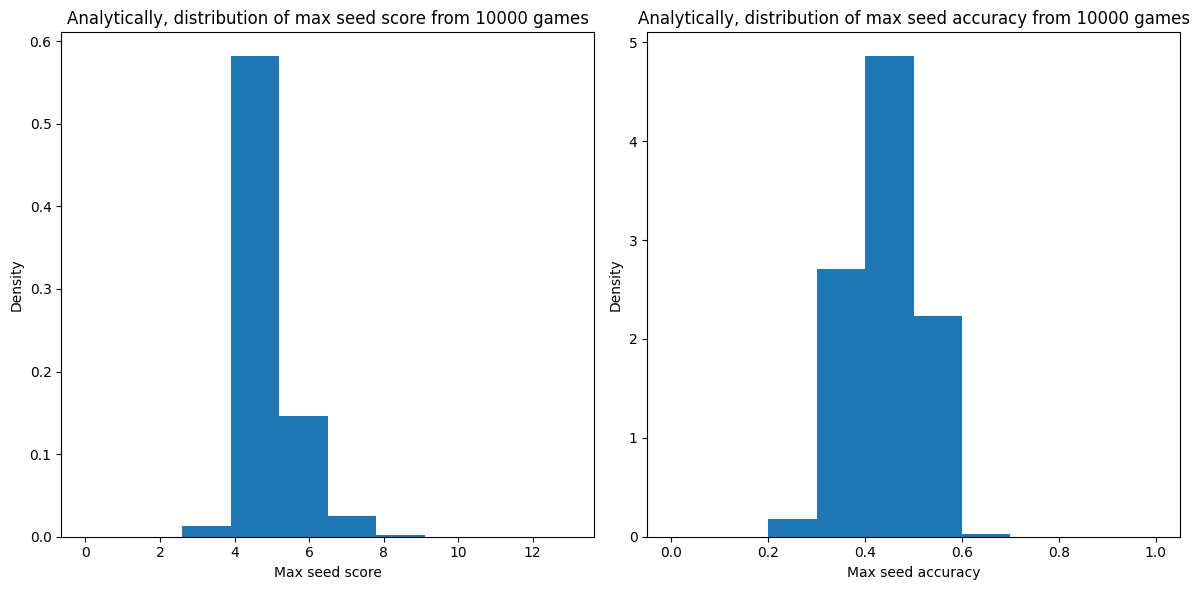

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(samples_sim, range=(0, 13), density=True)
axs[0].set_title(f'Analytically, distribution of max seed score from {n_sim} games')
axs[0].set_xlabel('Max seed score')
axs[0].set_ylabel('Density')

axs[1].hist(samples_sim/12, range=(0, 1), density=True)
axs[1].set_title(f'Analytically, distribution of max seed accuracy from {n_sim} games')
axs[1].set_xlabel('Max seed accuracy')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [6]:
ns = np.arange(0, 14)
avg_max_scores = np.zeros(len(ns))

for n in ns:
    samples_sim = np.zeros(n_sim)
    for i in range(n_sim):
        samples_sim[i] = max(sample_hypergeometric(13, n))
    avg_max_scores[n] = np.mean(samples_sim)

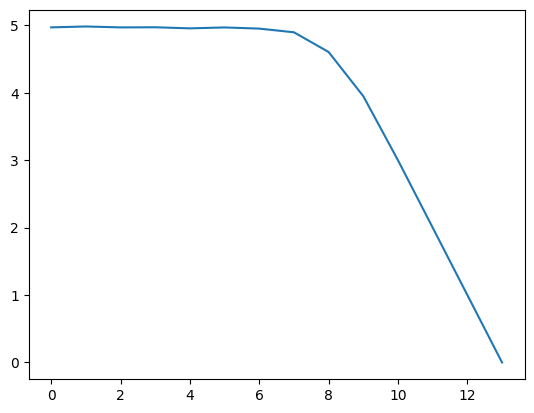

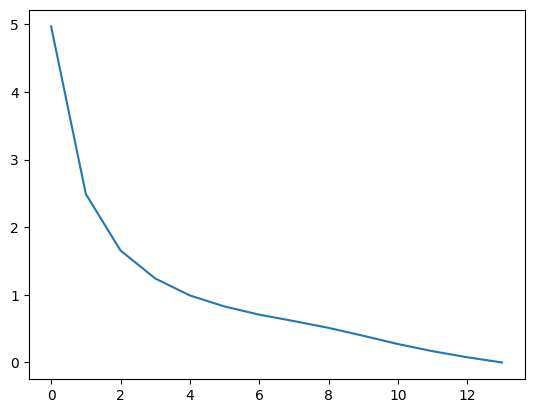

In [7]:
plt.figure()
plt.plot(ns[::-1], avg_max_scores)

plt.figure()
plt.plot(ns[::-1], avg_max_scores/np.arange(14, 0, -1))